In [2]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)

0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.


In [3]:
df_exploded = df.explode(column='job_skills')


In [4]:
df_grouped = df_exploded.groupby(['job_title_short', 'job_skills']).size().reset_index(name='skill_count')
df_grouped

,job_title_short,job_skills,skill_count
0,Business Analyst,airflow,318
1,Business Analyst,airtable,17
2,Business Analyst,alteryx,1078
3,Business Analyst,angular,87
4,Business Analyst,ansible,120
...,...,...,...
2251,Software Engineer,wrike,4
2252,Software Engineer,wsl,13
2253,Software Engineer,xamarin,35
2254,Software Engineer,yarn,145


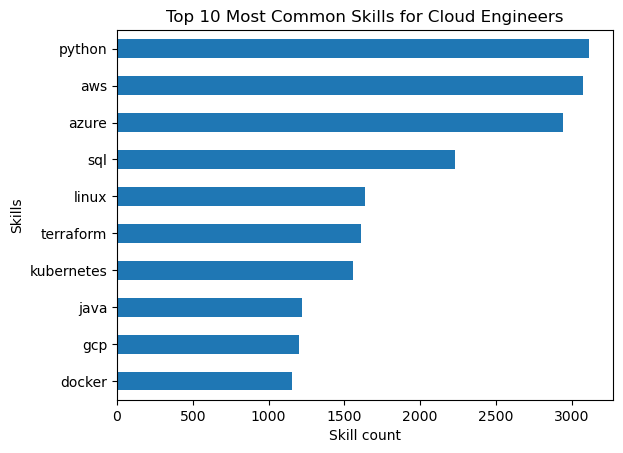

In [5]:
df_cloud_eng = df_grouped[(df_grouped['job_title_short'] == 'Cloud Engineer')].sort_values(by='skill_count', ascending=False).head(10)
df_cloud_eng.plot(kind='barh', x='job_skills', y='skill_count')
plt.gca().invert_yaxis()
plt.ylabel('Skills')
plt.xlabel('Skill count')
plt.title('Top 10 Most Common Skills for Cloud Engineers')
plt.legend().set_visible(False)

In [6]:
top_paid_skills = df_exploded.groupby('job_skills')['salary_year_avg'].agg('mean').reset_index(name='avg_skill_salary').sort_values(by='avg_skill_salary', ascending=False).head()
top_paid_skills

,job_skills,avg_skill_salary
46,debian,196500.000000
177,ringcentral,182500.000000
114,lua,170500.000000
126,mongo,169526.929749
54,dplyr,160667.210526


In [7]:
df_exploded.groupby('job_title_short')['job_skills'].nunique().reset_index(name='num_unique_skills').sort_values(by='num_unique_skills', ascending=False)

,job_title_short,num_unique_skills
3,Data Engineer,239
9,Software Engineer,239
4,Data Scientist,237
2,Data Analyst,235
7,Senior Data Engineer,226
0,Business Analyst,223
5,Machine Learning Engineer,222
8,Senior Data Scientist,215
1,Cloud Engineer,213
6,Senior Data Analyst,207


## Excercise

In [8]:
df['job_posted_month'] = df['job_posted_date'].dt.month.copy()
df_exploded = df.explode('job_skills')
df_exploded

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,6
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kafka,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh...",3
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kubernetes,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh...",3
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,docker,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh...",3
785740,Software Engineer,AWS System Analyst,India,melalui Trigyn,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Trigyn,aws,"{'cloud': ['aws'], 'other': ['flow']}",3


In [ ]:
df_data_analyst = df_exploded[df_exploded['job_title_short'] == 'Data Analyst']
data_analyst_skill_pivot = df_data_analyst.pivot_table(index='job_posted_month', columns='job_skills', aggfunc='size', fill_value=0)


In [21]:
data_analyst_skill_pivot.loc['Total'] = data_analyst_skill_pivot.sum()
data_analyst_skill_pivot
sorted_skills = data_analyst_skill_pivot.loc['Total'].sort_values(ascending=False).index
top_da_skills_trend = data_analyst_skill_pivot[sorted_skills]
top_da_skills_trend

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,2,0,0,1,0,0,0,1,0,0
2,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
3,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,0,1,0,0,0,0,1,0,0,0
4,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,1,0,0,0,0,0
5,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,0,0,1
6,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
7,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
8,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
9,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,0,0,0,0,0,0,0,0,0


In [23]:
top_da_skills_trend.drop('Total', inplace=True)


/var/folders/gc/_5j_cjdn78l5mqtbtj0rl_mc0000gn/T/ipykernel_28898/1059479053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_da_skills_trend.drop('Total', inplace=True)


<Axes: xlabel='job_posted_month'>

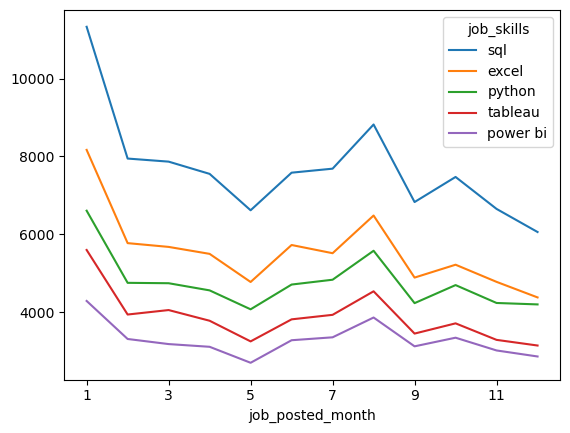

In [24]:
top_da_skills_trend.iloc[:, :5].plot(kind='line')